### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [334]:
data = pd.read_csv('data/coupons.csv')

In [277]:
data.head(20)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.


           destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h  Female  21  Unmarried partner  .

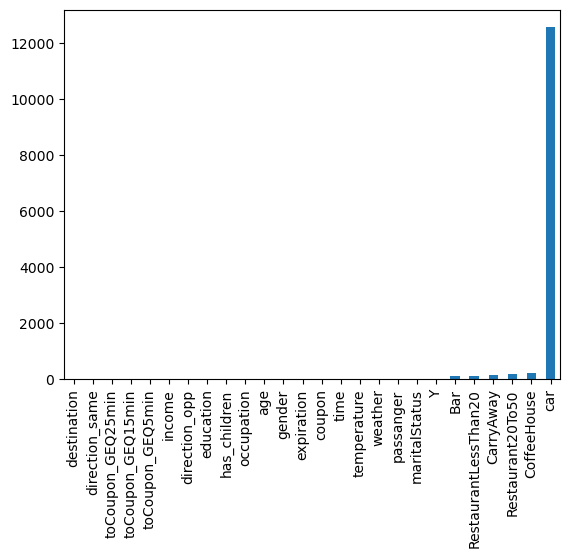

In [337]:
# Null Values data 
fig = data.isnull().sum().sort_values().plot(kind = 'bar')
fig

# NaN values in data
nan_values = data[data.isna().any(axis=1)]
print(nan_values)

# Null value counts in data - reflects fig
nan_counts = data.isnull().sum()
print(nan_counts)









3. Decide what to do about your missing data -- drop, replace, other...

NaN counts for each column in the DataFrame: destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64
No NaN values in the filtered DataFrame
No more NaN values expected in DataFrame: Empty DataFrame
Columns: [destination, passanger, weather, temperature, time, coupon, expiration, gender, age, maritalStatus, has_children, education, occupation, income, car, Bar, Cof

<Axes: >

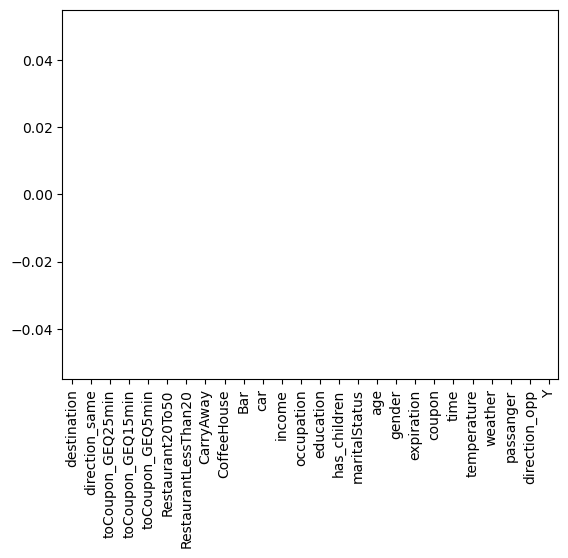

In [102]:
# Drop NaN values in data
filteredData = data.dropna()
new_nan_counts = filteredData.isna().sum()
print("NaN counts for each column in the DataFrame:", new_nan_counts)


# Check if there are any NaN values in the filtered DataFrame
if filteredData.isna().sum().sum() == 0:
    print("No NaN values in the filtered DataFrame")
else:
    print("Filtered DataFrame still contains NaN values")

# NaN values in data
rnan_values = filteredData[filteredData.isna().any(axis=1)]
print("No more NaN values expected in DataFrame:", rnan_values)

# Cleaned up null valued data
filledData = filteredData.fillna('not available')
newfig = filledData.isnull().sum().sort_values().plot(kind = 'bar')
newfig




4. What proportion of the total observations chose to accept the coupon? 



In [282]:
totalResponses = len(filledData['Y'])
acceptCouponData = filledData.query('Y == 1')
fractionAccepted = len(acceptCouponData)/totalResponses
print("Proportion that chose to accept coupon (%) :", fractionAccepted * 100)

#Verification - extra step
yes_counts = filledData['Y'].value_counts().reset_index()
print(yes_counts)

Proportion that chose to accept coupon (%) : 57.407407407407405
   Y  count
0  1     62
1  0     46


5. Use a bar plot to visualize the `coupon` column.

                  coupon  count
0           Coffee House     37
1        Restaurant(<20)     25
2  Carry out & Take away     19
3      Restaurant(20-50)     14
4                    Bar     13


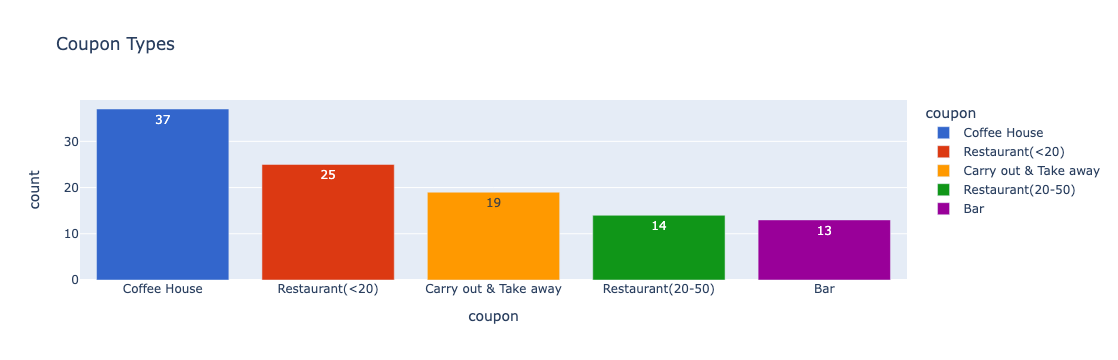

In [126]:
import plotly.express as px

coupon_counts = filledData['coupon'].value_counts().reset_index()
print(coupon_counts)
coupon_counts.columns = ['coupon', 'count']

# Create the bar plot with hover text showing the count
fig1 = px.bar(coupon_counts, x='coupon', y='count', color='coupon',
              color_discrete_sequence=px.colors.qualitative.G10,
              title="Coupon Types",
              text='count') 
fig1.show()

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

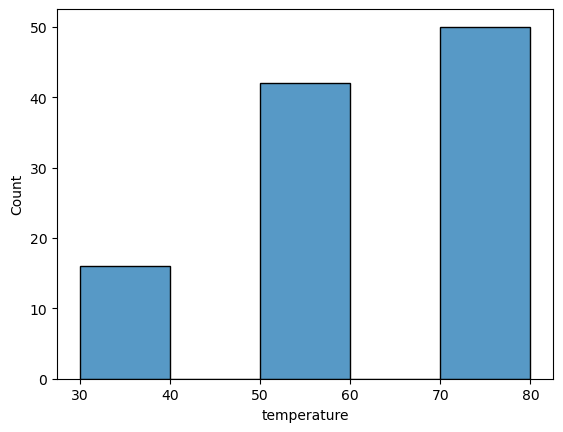

In [283]:
import warnings

# Suppress the warning
warnings.filterwarnings('ignore', message='use_inf_as_na option is deprecated', category=FutureWarning)

sns.histplot(filledData, x= 'temperature', bins=5)


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [137]:
barCouponData = filledData.query('coupon == "Bar"')
barCouponData.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1239,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1250,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,1,0,0
1254,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,1,1,0,1,0
2613,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,41,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,0
2617,Home,Alone,Sunny,55,6PM,Bar,1d,Female,41,Married partner,...,1~3,1~3,1~3,less1,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [285]:
totalBarCoupons = len(barCouponData)
acceptBarCouponData = barCouponData.query('Y == 1')
print("No of bar coupons accepted:", len(acceptBarCouponData))
print("Total no. of bar coupons:", len(barCouponData))
fractionBarCouponAccepted = len(acceptBarCouponData)/totalBarCoupons
print("Proportion that chose to accept bar coupon (%) :", fractionBarCouponAccepted * 100)

No of bar coupons accepted: 3
Total no. of bar coupons: 14
Proportion that chose to accept bar coupon (%) : 21.428571428571427


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [287]:


list_of_3_or_fewer_times = ['less1', 'never']
barCoupon3OrFewer = acceptBarCouponData[acceptBarCouponData["Bar"].isin(list_of_3_or_fewer_times)]


countAccepted3OrFewer = len(barCoupon3OrFewer)
countAllBarCouponAccepted = len(acceptBarCouponData)
print("From among bar coupons accepted, # that went to the bar 3 or Fewer times a month : ", countAccepted3OrFewer)
print("Proportion that went 3 or fewer times a month from those that accepted bar coupons (%): ", (countAccepted3OrFewer/countAllBarCouponAccepted) * 100)



From among bar coupons accepted, # that went to the bar 3 or Fewer times a month :  1
Proportion that went to bar 3 or fewer times a month from those that accepted (%):  33.33333333333333


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [292]:
# accepted bar coupons are either less than 1 time a month, or greater than 8 times a month
print(acceptBarCouponData['Bar'].value_counts())

# Convert 'age' column to numeric
barCouponData.loc[:, 'age'] = pd.to_numeric(barCouponData['age'], errors='coerce')

filteredBarCouponDataAgeOver25 = barCouponData.loc[(barCouponData['age'] > 25) & (barCouponData['Y'] == 1) & (barCouponData['Bar'] != "less1")]
print("From among bar coupons accepted, # that went where age > 25 and more than once a month: ", len(filteredBarCouponDataAgeOver25))

Bar
gt8      2
less1    1
Name: count, dtype: int64
From among bar coupons accepted, # that went where age > 25 and more than once a month:  2


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [295]:
print(barCouponData['occupation'].value_counts()) #this already contains data for occupations that are not farming/fishing/forestry, so not included in filter
print(barCouponData['passanger'].value_counts())

barCouponDataWithNoKidPassenger = barCouponData.query('passanger != "Kid(s)"')
barCouponData['age'] = pd.to_numeric(barCouponData['age'], errors='coerce')

filterBarCouponData = barCouponData.loc[(barCouponData['passanger'] != "Kid(s)") & (barCouponData['Y'] == 1) & (barCouponData['Bar'] != "less1")]
print("From among bar coupons accepted, # that went where they go more than once a month and had passengers that are not a kid and had non-farming/non-fish/non-forestry occupation : ", len(filteredBarCouponDataAgeOver25))


occupation
Computer & Mathematical            5
Sales & Related                    3
Legal                              3
Office & Administrative Support    2
Name: count, dtype: int64
passanger
Alone        8
Friend(s)    3
Kid(s)       2
Name: count, dtype: int64
From among bar coupons accepted, # that went where they go more than once a month and had passengers that are not a kid and had non-farming/non-fish/non-forestry occupation :  2


/var/folders/l7/c7jyzsn10f572jmzh3d7s5cc0000gn/T/ipykernel_96083/708558033.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [338]:
barCouponData['maritalStatus'].value_counts() # bar coupon data already has maritalStatus as NOT widowed

filter1 = barCouponData[(barCouponData['passanger'] != "Kid(s)") & (barCouponData['Y'] == 1) & (barCouponData['Bar'] == "gt8")]
filter2 = barCouponData[(barCouponData['age'] < 30) & (barCouponData['Y'] == 1) & (barCouponData['Bar'] == "gt8")]

print("For filter1, we have count = ", len(filter1))
print("For filter2, we have count = ", len(filter2))

print(filledData['RestaurantLessThan20'].value_counts()) # filledData shows that in cheap restaurants, folks eat less than 4 times a month
filledData['income'] = pd.to_numeric(filledData['income'], errors='coerce')

filter3 = filledData[(filledData['coupon'] == "Restaurant(<20)") & (filledData['income'] < 50000)]

print("For filter3, we have count = ", len(filter3))



For filter1, we have count =  2
For filter2, we have count =  2
RestaurantLessThan20
1~3      87
less1    21
Name: count, dtype: int64
For filter3, we have count =  0


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [187]:
# Not many chose to accept the bar coupon regardless of other criteria. It can be inferred that Bar Coupons cannot drive Customer acceptance


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

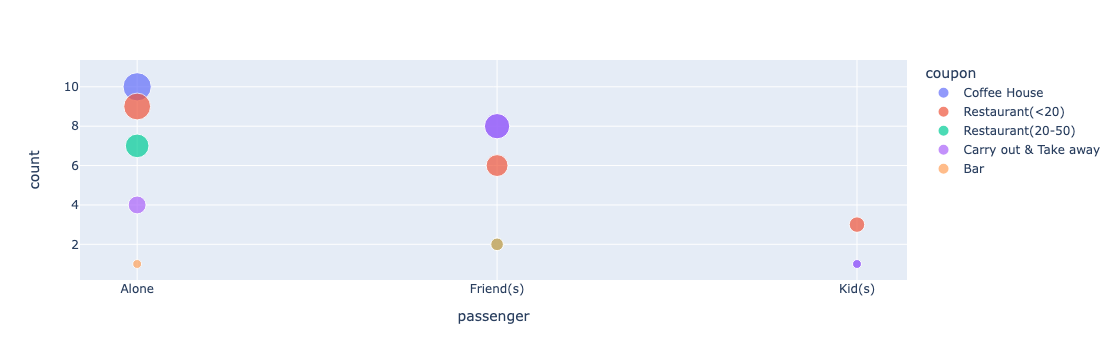

In [239]:
# How do different passengers accept coupons? 
acceptedCouponData = acceptedCouponData.rename(columns = {"passanger" : "passenger"})
passengerGroupedDataCounts = acceptedCouponData.groupby('passenger')[['passenger', 'coupon']].value_counts().reset_index()
passengerGroupedDataCounts.columns = ['passenger', 'coupon', 'count']

passengerGroupedDataCounts.head()

# Create a scatter plot with hover text showing the accepted passenger groups for different coupon types accepted
fig2 = px.scatter(passengerGroupedDataCounts, x = "passenger", y = "count", color = "coupon", size = "count")
fig2.show()

# Conclusion1 = Those with Alone passengers are more likely to accept coupons for coffee house(s) followed by coupons for cheap restaurants
# Conclusion2 = Those with Friend(s) passengers are more likely to accept coupons for Carry Out and Take away, followed by coupons for cheap restautants






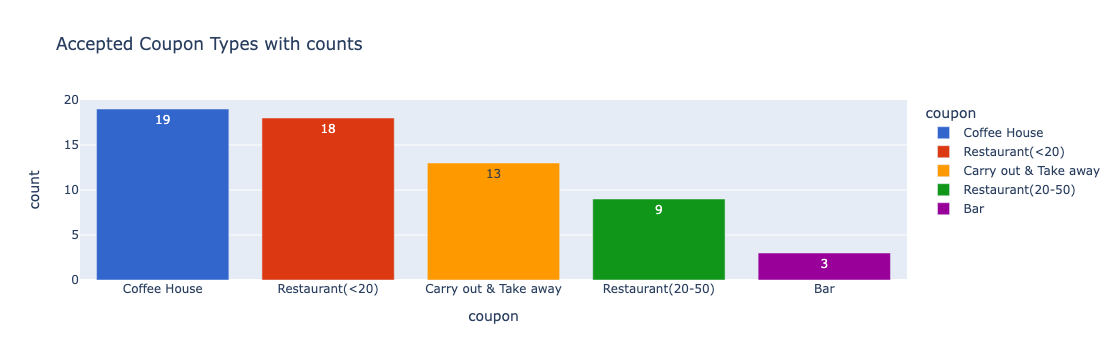

                  coupon  count
0           Coffee House     37
1        Restaurant(<20)     25
2  Carry out & Take away     19
3      Restaurant(20-50)     14
4                    Bar     13


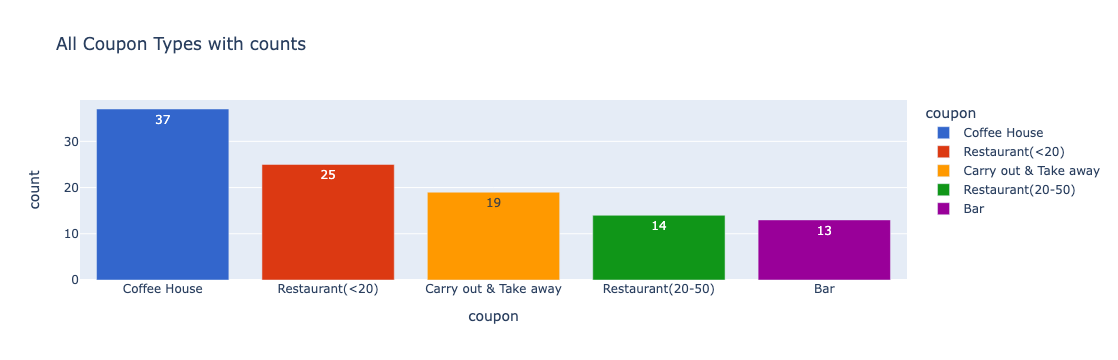

In [297]:

# look across all coupon types that have been accepted to see which coupon type is accepted most
acceptedCouponData = filledData.query('Y == 1')
acceptedCouponCounts = acceptedCouponData['coupon'].value_counts().reset_index()
acceptedCouponCounts.columns = ['coupon', 'count']

acceptedCouponCounts

# Create the bar plot with hover text showing the accepted Coupon Count
fig1 = px.bar(acceptedCouponCounts, x='coupon', y='count', color='coupon',
              color_discrete_sequence=px.colors.qualitative.G10,
              title="Accepted Coupon Types with counts",
              text="count") 
fig1.show()


allCouponCounts = filledData['coupon'].value_counts().reset_index()
print(allCouponCounts)
allCouponCounts.columns = ['coupon', 'count']

# Create the bar plot with hover text showing the count
fig6 = px.bar(allCouponCounts, x='coupon', y='count', color='coupon',
              color_discrete_sequence=px.colors.qualitative.G10,
              title="All Coupon Types with counts",
              text="count") 
fig6.show()

# Conclusion1 = Comparing Coupon Type for cheap restaurants to those that were accepted, out of 25, we have 18 that accepted and 7 not accepted. 72% acceptance.
# Conclusion2 = Comparing Coupon Type for coffee house to those that were accepted, out of 37, we have 19 that accepted, and 18 did not accept. 51.35% acceptance.
# Conclusion3 = Comparing Coupon Type for carry out and take away, out of 19 sent, 13 accepted and 6 did not accept. 68.4% acceptance.
# Conclusion4 = Comparing Coupon Type for bar, out of 13 sent, 3 accepted, and 10 did not. 23.07% acceptabce.

# Overall Conclusion = Coupons for cheap restaurants (<$20) get accepted the most


     maritalStatus  has_children           coupon  \
0  Married partner             1  Restaurant(<20)   
1           Single             0  Restaurant(<20)   

   countByMaritalStatusAndCoupon  
0                              7  
1                             11  


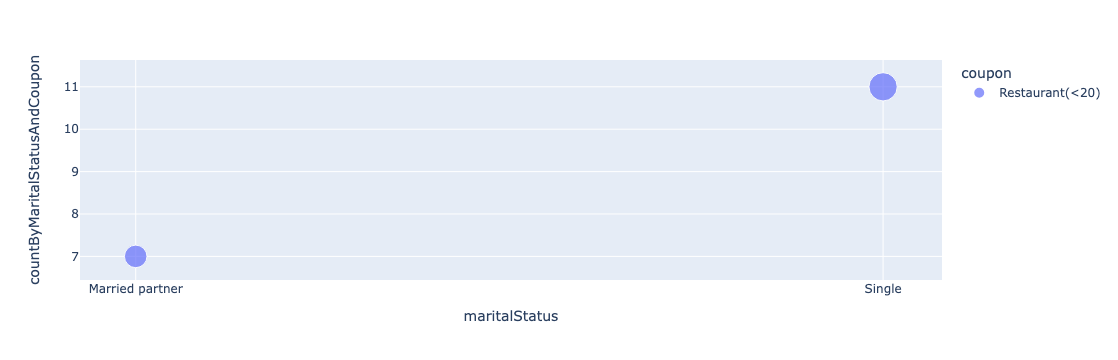

     maritalStatus  has_children                 coupon  \
0  Married partner             1  Carry out & Take away   
1  Married partner             1           Coffee House   
2  Married partner             1      Restaurant(20-50)   
3  Married partner             1        Restaurant(<20)   
4           Single             0                    Bar   
5           Single             0  Carry out & Take away   
6           Single             0           Coffee House   
7           Single             0      Restaurant(20-50)   
8           Single             0        Restaurant(<20)   

   countByMaritalStatusAndCoupon  
0                              5  
1                             10  
2                              2  
3                              7  
4                              3  
5                              8  
6                              9  
7                              7  
8                             11  


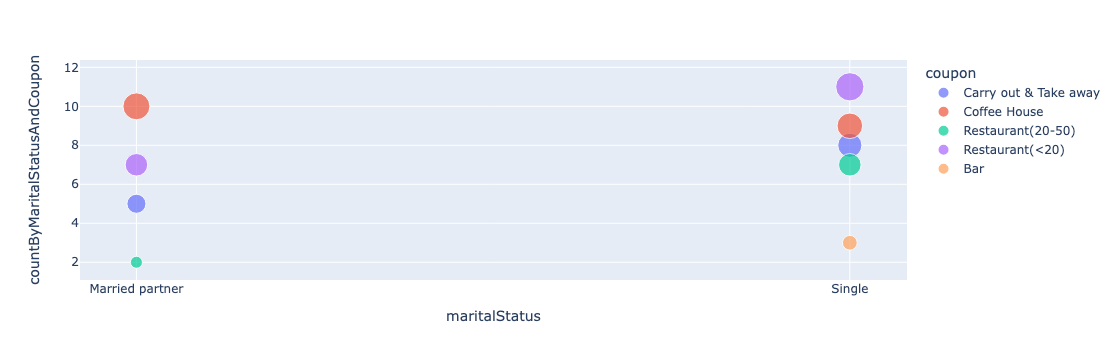

In [316]:
# How does marital status and having children influence coupon acceptance for cheap restaurants?
cheapRestaurantsAccepted = acceptedCouponData.query('coupon == "Restaurant(<20)"')
maritalStatusForCheapRestsData = cheapRestaurantsAccepted.groupby(['maritalStatus', 'has_children', 'coupon'])[['maritalStatus', 'coupon']].value_counts().reset_index()
maritalStatusForCheapRestsData.columns = ['maritalStatus', 'has_children', 'coupon', 'countByMaritalStatusAndCoupon']

print(maritalStatusForCheapRestsData)

# Create a scatter plot with hover text showing the marital status groups for different coupon types accepted
figX = px.scatter(maritalStatusForCheapRestsData, x = "maritalStatus", y = "countByMaritalStatusAndCoupon", color = "coupon", size = "countByMaritalStatusAndCoupon")
figX.show()

# How does marital status and having children influence coupon acceptance across ALL coupon types
maritalStatusForAllData = acceptedCouponData.groupby(['maritalStatus', 'has_children', 'coupon'])[['maritalStatus', 'coupon']].value_counts().reset_index()
maritalStatusForAllData.columns = ['maritalStatus', 'has_children', 'coupon', 'countByMaritalStatusAndCoupon']

print(maritalStatusForAllData)

# Create a scatter plot with hover text showing the marital status groups for different coupon types accepted
figY = px.scatter(maritalStatusForAllData, x = "maritalStatus", y = "countByMaritalStatusAndCoupon", color = "coupon", size = "countByMaritalStatusAndCoupon")
figY.show()


# Conclusion = Married partners with children are more like to accept coupon types for coffee house, followed by coupon types for restaurants(<20)
# Conclusion = Singles with no children are more likely to accept coupon types for restaurants(<20), followed by coupon types for coffee house



    time                 coupon  countByTimeAndCoupon
0   10AM                    Bar                     1
1   10AM  Carry out & Take away                     2
2   10AM           Coffee House                     4
3   10AM        Restaurant(<20)                     3
4   10PM                    Bar                     1
5   10PM  Carry out & Take away                     2
6   10PM           Coffee House                     1
7   10PM      Restaurant(20-50)                     1
8   10PM        Restaurant(<20)                     1
9    2PM  Carry out & Take away                     3
10   2PM           Coffee House                     5
11   2PM      Restaurant(20-50)                     2
12   2PM        Restaurant(<20)                     6
13   6PM                    Bar                     1
14   6PM  Carry out & Take away                     4
15   6PM           Coffee House                     5
16   6PM      Restaurant(20-50)                     1
17   6PM        Restaurant(<

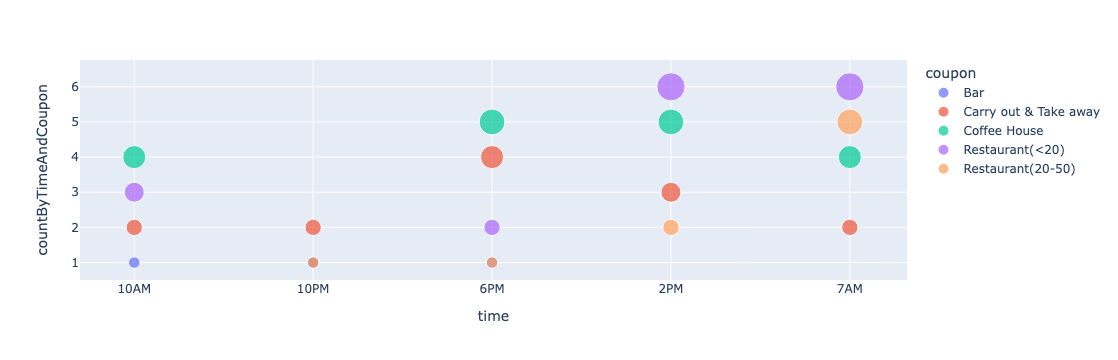

In [314]:
# Does time of day influence coupon acceptance?
timeofdayDataCounts = acceptedCouponData.groupby(['time', 'coupon'])[['time', 'coupon']].value_counts().reset_index()
timeofdayDataCounts.columns = ['time',  'coupon', 'countByTimeAndCoupon']

print(timeofdayDataCounts)

# Create a scatter plot with hover text showing the time of day for different coupon types accepted
fig4 = px.scatter(timeofdayDataCounts, x = "time", y = "countByTimeAndCoupon", color = "coupon", size = "countByTimeAndCoupon")
fig4.show()

# Conclusion1 = At 10 am and 6 pm, coffee house type coupons are accepted more.
# Conclusion2 = At 2pm and 7am, restaurant(<20) coupons are accepted more.


  CoffeeHouse  countCoffeeHouse
0         1~3                 4
1         4~8                 5
2       less1                10


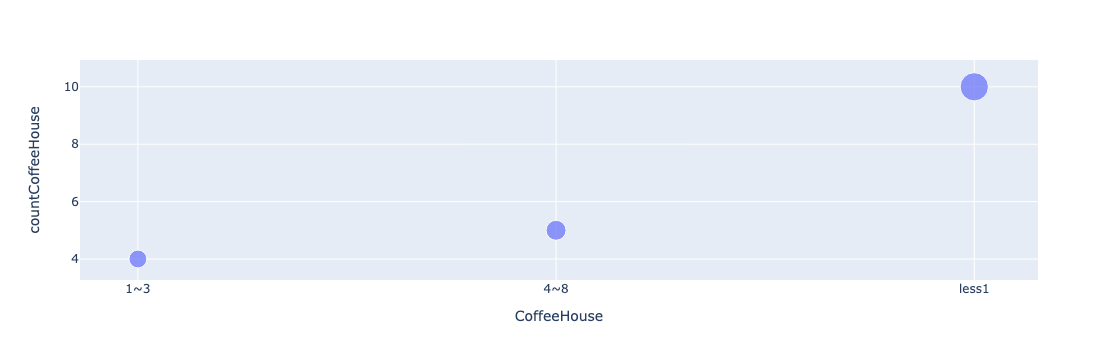

                  destination  passanger weather  temperature  time  \
coupon                                                                
Coffee House  No Urgent Place  Friend(s)   Sunny           80   2PM   
Coffee House  No Urgent Place  Friend(s)   Sunny           80   2PM   
Coffee House  No Urgent Place      Alone   Sunny           55  10AM   
Coffee House             Home      Alone   Sunny           80   6PM   
Coffee House             Work      Alone   Sunny           55   7AM   
Coffee House  No Urgent Place  Friend(s)   Sunny           80  10AM   
Coffee House  No Urgent Place  Friend(s)   Sunny           80   2PM   
Coffee House             Home      Alone   Sunny           80   6PM   
Coffee House             Work      Alone   Sunny           55   7AM   
Coffee House  No Urgent Place  Friend(s)   Sunny           80  10AM   
Coffee House  No Urgent Place  Friend(s)   Sunny           80   2PM   
Coffee House  No Urgent Place  Friend(s)   Sunny           80   2PM   
Coffee

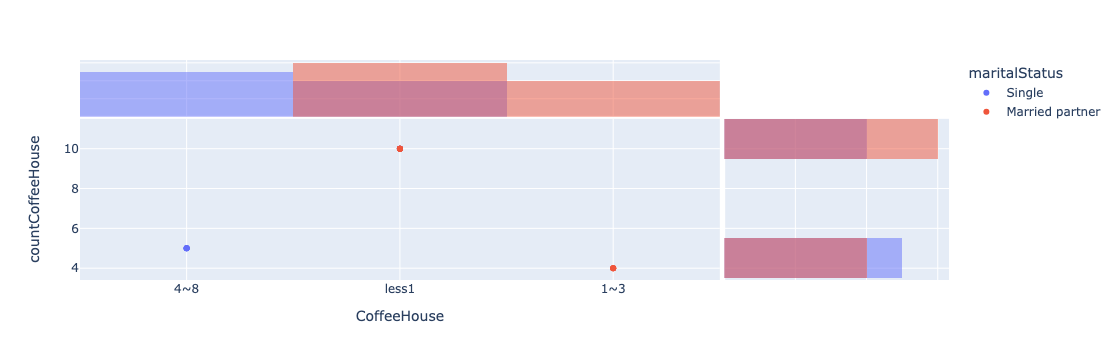

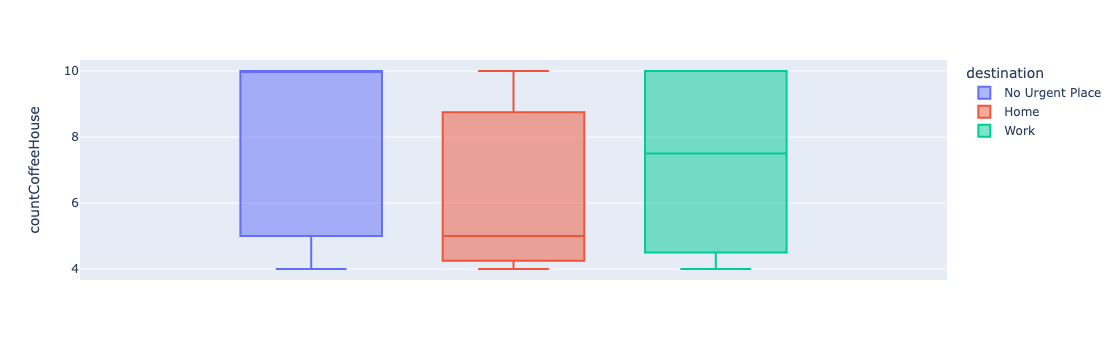

In [333]:
# Get a dataframe for accpeted coupon type of Coffee House
acceptedCouponTypeforCoffeeHouse = acceptedCouponData.query('coupon == "Coffee House"')

# Make another dataframe for accepted coupon type of Coffee House, grouped by its column CoffeeHouse and its unique values
acceptedCoffeeHouseDataCounts = acceptedCouponTypeforCoffeeHouse.groupby('CoffeeHouse')[['CoffeeHouse']].value_counts().reset_index()
acceptedCoffeeHouseDataCounts.columns = ['CoffeeHouse',  'countCoffeeHouse']

print(acceptedCoffeeHouseDataCounts)

# Plot the distribution to show how many accepted coupons visited a CoffeeHouse between 1-3 times, 4-8 times and less than 1 time a month
figA = px.scatter(acceptedCoffeeHouseDataCounts, x = "CoffeeHouse", y = "countCoffeeHouse", size = "countCoffeeHouse")
figA.show()

# Conclusion = Coupon types of CoffeeHouse allows for customers (10 out of the total 19 accepted) accepting this coupon type to visit less than 1-time a month because of a coupon presented

# What other observations can I make by merging these 2 dataframes together?
merged_df = pd.merge(acceptedCouponTypeforCoffeeHouse, acceptedCoffeeHouseDataCounts, on=['CoffeeHouse'], how = 'outer').set_index('coupon')
print(merged_df)

figO = px.scatter(merged_df, x = "CoffeeHouse", y = "countCoffeeHouse", marginal_y = "histogram", marginal_x = "histogram", color="maritalStatus")
figO.show()

# Conclusion = Singles visit coffee house more often (4-8 times) than Married partners for accepted coffee house type coupons 


# Box plot to visualize distribution of counts across accepted coffee house coupon types across various destinations.
figX = px.box(merged_df, y = "countCoffeeHouse", color = "destination")
figX.show()

# Conclusion = Customers are more likely to accept coffee house type coupons when their destination is "No Urgent Place" - median 10.
# They are less likely to accept coffee house type coupons when their destination is "Home' - median 5.